# Data Analysis - IT Helpdesk Tickets
<br/>
Most names have been encrypted to help protect personal data.  Some names were replaced with randomly generated names, using the following name generator:<br/>
Fossbytes Name Generator<br/>
https://fossbytes.com/tools/random-name-generator<br/>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Requests-before-2023--ENCRYPTED.csv')

In [3]:
df = df.set_index('Request ID')
df = df.sort_index(ascending=True)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9562 entries, 9067 to 20479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            9562 non-null   int64 
 1   Branch or Department  9562 non-null   object
 2   Created Date          9562 non-null   object
 3   Resolved Date         9562 non-null   object
 4   Last Update Time      9562 non-null   object
 5   DueBy Date            9562 non-null   object
 6   Completed Date        9562 non-null   object
 7   Requester             9562 non-null   object
 8   Technician            9562 non-null   object
 9   Priority              9562 non-null   object
 10  Status                9562 non-null   object
dtypes: int64(1), object(10)
memory usage: 896.4+ KB


,Unnamed: 0,Branch or Department,Created Date,Resolved Date,Last Update Time,DueBy Date,Completed Date,Requester,Technician,Priority,Status
Request ID,,,,,,,,,,,
9067,9561,3973e022e93220f9212c18d0d0c543ae7c309e46640da9...,"Feb 21, 2016 06:28 PM","Feb 21, 2016 06:28 PM",-,-,"Feb 21, 2016 06:28 PM",a6bc80ac1ac7d4d35f422805fb6d4fe570b61a122aa14d...,4b1a60bf862d9b7ab7458fe157ed592a5239a0bed7e26c...,-,Closed
9068,9560,3973e022e93220f9212c18d0d0c543ae7c309e46640da9...,"Feb 21, 2016 06:28 PM","Apr 1, 2016 12:32 PM","Apr 1, 2016 12:32 PM",-,"Apr 1, 2016 12:32 PM",f5be5d5708511d3cb69d194b119568e732919fb566a028...,706cb695a77f522f631bff8b6ecda9d1f834392cb9383e...,-,Closed
9069,9559,3973e022e93220f9212c18d0d0c543ae7c309e46640da9...,"Feb 21, 2016 06:28 PM","Feb 21, 2016 06:28 PM",-,-,"Feb 21, 2016 06:28 PM",570af61f3635984524f45778bed222c6906acbde7c6785...,3973e022e93220f9212c18d0d0c543ae7c309e46640da9...,-,Closed
9070,9558,3973e022e93220f9212c18d0d0c543ae7c309e46640da9...,"Feb 21, 2016 06:28 PM","Feb 21, 2016 06:28 PM",-,-,"Feb 21, 2016 06:28 PM",c3f7bfb1d4f20279764f4888dfb9f117219ac342680c6c...,706cb695a77f522f631bff8b6ecda9d1f834392cb9383e...,-,Closed
9071,9557,3973e022e93220f9212c18d0d0c543ae7c309e46640da9...,"Feb 21, 2016 06:28 PM","Mar 22, 2016 11:27 AM","Mar 22, 2016 11:27 AM",-,"Mar 22, 2016 11:27 AM",c3f7bfb1d4f20279764f4888dfb9f117219ac342680c6c...,706cb695a77f522f631bff8b6ecda9d1f834392cb9383e...,-,Closed


In [5]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Resolved Date'] = pd.to_datetime(df['Resolved Date'], errors='coerce')
df['Last Update Time'] = pd.to_datetime(df['Last Update Time'], errors='coerce')
df['DueBy Date'] = pd.to_datetime(df['DueBy Date'], errors='coerce')
df['Completed Date'] = pd.to_datetime(df['Completed Date'], errors='coerce')

C:\Users\jhoover\AppData\Local\Temp\ipykernel_17728\225055368.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'])
C:\Users\jhoover\AppData\Local\Temp\ipykernel_17728\225055368.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Resolved Date'] = pd.to_datetime(df['Resolved Date'], errors='coerce')
C:\Users\jhoover\AppData\Local\Temp\ipykernel_17728\225055368.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Update Time'] = pd.to_datetime(df['Last Update Time'], errors='coerce')
C:\Users\jhoover\AppData\L

In [6]:
# Prevent false positive error when running code in future cells
pd.options.mode.chained_assignment = None

In [7]:
# find tickets where resolved date is not 2016-02-21
# find tickets where agency is not '-'
#df['Resolved Date'] > datetime.date(2016,2,21)
df_backup = df
df = df[(df['Resolved Date'] > '2016-02-22') & 
        (df['Branch or Department'] != '3973e022e93220f9212c18d0d0c543ae7c309e46640da93a4a0314de999f5112')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7243 entries, 11435 to 20479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            7243 non-null   int64         
 1   Branch or Department  7243 non-null   object        
 2   Created Date          7243 non-null   datetime64[ns]
 3   Resolved Date         7243 non-null   datetime64[ns]
 4   Last Update Time      7185 non-null   datetime64[ns]
 5   DueBy Date            3937 non-null   datetime64[ns]
 6   Completed Date        7232 non-null   datetime64[ns]
 7   Requester             7243 non-null   object        
 8   Technician            7243 non-null   object        
 9   Priority              7243 non-null   object        
 10  Status                7243 non-null   object        
dtypes: datetime64[ns](5), int64(1), object(5)
memory usage: 679.0+ KB


In [8]:
df.head()

,Unnamed: 0,Branch or Department,Created Date,Resolved Date,Last Update Time,DueBy Date,Completed Date,Requester,Technician,Priority,Status
Request ID,,,,,,,,,,,
11435,7280,20c184af6b847b6db63e9507efd3891df88a6981c9d89b...,2017-07-25 16:25:00,2017-08-02 14:03:00,2017-08-02 08:55:00,2017-07-26 00:25:00,2017-08-02 14:03:00,989ec90cd93d47ac0888b7f1b6a4c087657e8531fd9067...,41b30f29e1549ba7c22f904aed1ba3c69644cb17692d02...,Low,Closed
11448,7269,bd5e1db3017037c56237a72ea2fbff0276be7fae91094f...,2017-07-27 15:18:00,2017-07-28 10:21:00,2017-07-28 10:21:00,NaT,2017-07-28 10:21:00,31c36879c085c850f60eb6e3223f8c9b107c4d6a1d73dd...,97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeea...,-,Closed
11450,7268,f87e3ca8d105d33d11df6610ff234747d0e4c1bc583ab7...,2017-07-27 15:50:00,2017-08-03 13:26:00,2017-08-03 13:26:00,2017-07-27 16:50:00,2017-08-03 13:26:00,1bf3268841c596c49ead0445b009a574d50104b5fad6c6...,97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeea...,High,Closed
11451,7267,23b710b601e235e1823d4c41d7da9f2aeb7a197b16e26f...,2017-07-27 16:31:00,2017-07-28 12:18:00,2017-07-28 12:18:00,2017-07-27 20:31:00,2017-07-28 12:18:00,01fbda0b1b76b15130298dfc080cdfac7110ec3337a7ef...,4b1a60bf862d9b7ab7458fe157ed592a5239a0bed7e26c...,Normal,Closed
11452,7266,881dac23c6a82829e90bca7dc670f92077d01aa407e9b8...,2017-07-27 16:44:00,2017-07-28 09:31:00,2017-07-28 09:31:00,2017-07-27 17:44:00,2017-07-28 09:31:00,a292190b0fcccaa7b2204ff13f83a0396e85ed49a7a662...,97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeea...,High,Closed


In [9]:
df.Technician.unique()

array(['41b30f29e1549ba7c22f904aed1ba3c69644cb17692d02da6399e0cc47ca4482',
       '97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeeacec25466be1c8bbe55',
       '4b1a60bf862d9b7ab7458fe157ed592a5239a0bed7e26ce8a9426a5314948add',
       'dc3ae4a216c2ad6edb926fc99964b11a03006b5c88f20e5872a6b7f8181e6283',
       'e3fd25a60e34b047093fc18f0a8c48fb00b1596ddef09d1c64d980c18b928c66',
       '8a969d28ab6e9f8fe017fd88f916e8be34a57cc3346529259723dac3663b7c19',
       '6a61d283bedbc2ab1d446dca7ecfda51ba5650c69988bdedc064f1352bcfce64',
       '8b39e82850bd47893bada7623f1d26cd09ad5965d349c23cb379865f306e9e39',
       '3973e022e93220f9212c18d0d0c543ae7c309e46640da93a4a0314de999f5112',
       '4f9d822d0585dc9dda13f4e5c9d9242b099970e98e0f31b47369a16e6c1ca616',
       'd7ea0aabc7963b151d99abb6e8dd476c8c9daa947caab474b2c4dd77bcbe3041',
       'aed976b4283b3488486ce9b460e3c8faa8c8b1917a0430ed59e343f1e99caea6',
       'ba0eafc845c7553d077b4bf24b3d133d96bdc3ccd97a5e7e8c48db21e8e3a337',
       'b73b8dd3ad8e9767b

In [10]:
df.Technician.value_counts()

Technician
dc3ae4a216c2ad6edb926fc99964b11a03006b5c88f20e5872a6b7f8181e6283    2143
97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeeacec25466be1c8bbe55    1586
8a969d28ab6e9f8fe017fd88f916e8be34a57cc3346529259723dac3663b7c19     878
4b1a60bf862d9b7ab7458fe157ed592a5239a0bed7e26ce8a9426a5314948add     820
3973e022e93220f9212c18d0d0c543ae7c309e46640da93a4a0314de999f5112     727
13a5380f9d705dfaeb1b5ec85ce383e27dbc2e1f74ccabeeaf7abf83ebf87be6     411
41b30f29e1549ba7c22f904aed1ba3c69644cb17692d02da6399e0cc47ca4482     254
6a61d283bedbc2ab1d446dca7ecfda51ba5650c69988bdedc064f1352bcfce64     230
8b39e82850bd47893bada7623f1d26cd09ad5965d349c23cb379865f306e9e39     124
e3fd25a60e34b047093fc18f0a8c48fb00b1596ddef09d1c64d980c18b928c66      48
d7ea0aabc7963b151d99abb6e8dd476c8c9daa947caab474b2c4dd77bcbe3041      14
aed976b4283b3488486ce9b460e3c8faa8c8b1917a0430ed59e343f1e99caea6       5
4f9d822d0585dc9dda13f4e5c9d9242b099970e98e0f31b47369a16e6c1ca616       1
ba0eafc845c7553d077b4bf24b3d133d96bdc3cc

In [11]:
df_agency = df['Branch or Department'].value_counts()
df['Branch or Department'].value_counts()

Branch or Department
bd5e1db3017037c56237a72ea2fbff0276be7fae91094f485f9425643c90f107    516
23b710b601e235e1823d4c41d7da9f2aeb7a197b16e26fcc6a0245da2482b443    407
915edf6fa6e1c9ed512729dce7441ea3cada663f3a353c7be63344f5f5e72819    399
b44f639eb862790029a63aa2cd4222cffe20c71b9c5e4e8657f53b6cf295d4ab    344
822f819f9a68017f4a79ae107bc8be0c0efc4e2e46ecc785126958f127f123e5    334
6b168c3be1b7c0d7da967df12fe46ad90ff8c00cf8ed5e2b0fca8629ccc9693e    298
436921cf5e22bc9fce9ad37f9071252f85510571e46dea6604bfcc0f7859744f    275
befb892ca9f37720678e3a8329d18bd801790c69cf0ec436c7f2168938801401    267
922b26f3eb1726e4e08efc3636f4cb76f05e11e97b1b152f5ee3e2c8909453e9    259
5eda253d7011fd05fc32ec8c19864408ed3fa4c8bd82b46f1541b67f14c3bd0c    257
01f0f6ee06d8298a4c0fdd80a2492114bf93c3c9295f6af6e13d816194da9a6c    250
4290cfd797e6e2d711bfd00b4c1239372e9d1c6483883d4c53a70345e340a30a    248
68e22f8d34e53e56fbef5a671fedd33023edd90ef7b8270ddb73dbae8e691eae    222
20c184af6b847b6db63e9507efd3891df88a6981c9d

In [12]:
ser_agency_counts = df['Branch or Department'].value_counts()

<p><b>The following will select all helpdesk tickets created in the year 2020.  It will then group them by the Branch or Department and show how many tickets each one had that year, sorted in descending order.</b></p>
<p><b>This can be done for each year and gives us very useful information about which branches have more reported technology issues, and how these numbers change over time.</b></p>

In [13]:
# Create totals for each branch, by year.
df_2020 = df[df['Created Date'].dt.year == 2020]

In [14]:
df_2020.head()

,Unnamed: 0,Branch or Department,Created Date,Resolved Date,Last Update Time,DueBy Date,Completed Date,Requester,Technician,Priority,Status
Request ID,,,,,,,,,,,
15685,4459,6b168c3be1b7c0d7da967df12fe46ad90ff8c00cf8ed5e...,2020-01-02 09:40:00,2020-01-02 10:26:00,2020-01-02 10:26:00,NaT,2020-01-02 10:26:00,be2ca7c8beef1c4aaa8606a92b6234ab4ff3840c0819ae...,dc3ae4a216c2ad6edb926fc99964b11a03006b5c88f20e...,-,Closed
15686,4458,4743adc66005f7d5ce293e58be771d57a3efe1d3935b35...,2020-01-02 10:25:00,2020-01-02 11:47:00,2020-01-02 11:47:00,2020-01-02 14:25:00,2020-01-02 11:47:00,b08c44332b7573ebecb1e76a1f4a7046db4308bb77893a...,8a969d28ab6e9f8fe017fd88f916e8be34a57cc3346529...,Normal,Closed
15687,4457,4743adc66005f7d5ce293e58be771d57a3efe1d3935b35...,2020-01-02 10:58:00,2020-01-02 11:41:00,2020-01-02 11:41:00,2020-01-02 11:58:00,2020-01-02 11:41:00,33d5926657ba393eadc7cd46851cafe2bd0ad091becb32...,8a969d28ab6e9f8fe017fd88f916e8be34a57cc3346529...,High,Closed
15688,4456,4743adc66005f7d5ce293e58be771d57a3efe1d3935b35...,2020-01-02 11:02:00,2020-01-02 11:40:00,2020-01-02 11:40:00,2020-01-02 12:02:00,2020-01-02 11:40:00,33d5926657ba393eadc7cd46851cafe2bd0ad091becb32...,8a969d28ab6e9f8fe017fd88f916e8be34a57cc3346529...,High,Closed
15689,4455,529ec7fcae822a1b46a051a692f925c832b56cdeab8f91...,2020-01-02 11:28:00,2020-03-06 14:20:00,2020-03-06 14:20:00,NaT,2020-03-06 14:20:00,e8ae6b588a3cb994309c4092f055c2c2fc7ea33a39afa6...,8a969d28ab6e9f8fe017fd88f916e8be34a57cc3346529...,-,Closed


In [15]:
df_2020['Branch or Department'].value_counts()

Branch or Department
bd5e1db3017037c56237a72ea2fbff0276be7fae91094f485f9425643c90f107    108
23b710b601e235e1823d4c41d7da9f2aeb7a197b16e26fcc6a0245da2482b443     77
76ff7e1c85f18cb6b958cb29688f497f1effec2852d3ff499b4c23d7eb52ec31     70
01f0f6ee06d8298a4c0fdd80a2492114bf93c3c9295f6af6e13d816194da9a6c     69
70c4e9e6d60f765bdd3853c5f27a820b84dc7e6e0bcf603ba46fe09390414065     67
915edf6fa6e1c9ed512729dce7441ea3cada663f3a353c7be63344f5f5e72819     67
b44f639eb862790029a63aa2cd4222cffe20c71b9c5e4e8657f53b6cf295d4ab     59
436921cf5e22bc9fce9ad37f9071252f85510571e46dea6604bfcc0f7859744f     57
6b168c3be1b7c0d7da967df12fe46ad90ff8c00cf8ed5e2b0fca8629ccc9693e     49
822f819f9a68017f4a79ae107bc8be0c0efc4e2e46ecc785126958f127f123e5     49
51bbcebde7faf7f1546bdfe38768c83f5e5e1853450b67614bdf4c30125bbe14     48
922b26f3eb1726e4e08efc3636f4cb76f05e11e97b1b152f5ee3e2c8909453e9     47
28fb770b9d42844d3dd3da5018fde0614b13e29405d65fe39414e306d9584cfa     43
68e22f8d34e53e56fbef5a671fedd33023edd90ef7b

In [16]:
# Columns are dates (month-year)
df['month_year_created'] = df['Created Date'].dt.to_period('M')

df['month_year_created'].head(10)

Request ID
11435    2017-07
11448    2017-07
11450    2017-07
11451    2017-07
11452    2017-07
11453    2017-07
11454    2017-07
11455    2017-07
11456    2017-07
11457    2017-07
Name: month_year_created, dtype: period[M]

In [17]:
# Rows are Agencies
rows_branch = df['Branch or Department'].unique()

In [18]:
rows_branch

array(['20c184af6b847b6db63e9507efd3891df88a6981c9d89b1c4ce0c90b86d17264',
       'bd5e1db3017037c56237a72ea2fbff0276be7fae91094f485f9425643c90f107',
       'f87e3ca8d105d33d11df6610ff234747d0e4c1bc583ab789bf0fcc207f4ff615',
       '23b710b601e235e1823d4c41d7da9f2aeb7a197b16e26fcc6a0245da2482b443',
       '881dac23c6a82829e90bca7dc670f92077d01aa407e9b89c057accebd5222810',
       '6b168c3be1b7c0d7da967df12fe46ad90ff8c00cf8ed5e2b0fca8629ccc9693e',
       '436921cf5e22bc9fce9ad37f9071252f85510571e46dea6604bfcc0f7859744f',
       'ee4a987e2ebd0cd397b140c68d57ed21b2e98283a879021a8db0e7cdf850f2da',
       'a76cc9a36c0708c5943308d79faa934d7d4aecc39c8ff25e0735a160d2368fa6',
       '915edf6fa6e1c9ed512729dce7441ea3cada663f3a353c7be63344f5f5e72819',
       '4290cfd797e6e2d711bfd00b4c1239372e9d1c6483883d4c53a70345e340a30a',
       '2a2f86e61be73d535da4542ac216575fd00f14cec20878a8a3931496dba94058',
       '01f0f6ee06d8298a4c0fdd80a2492114bf93c3c9295f6af6e13d816194da9a6c',
       'befb892ca9f377206

In [19]:
df['resolved_time'] = (df['Resolved Date'] - df['Created Date']).dt.days

In [20]:
df.head()

,Unnamed: 0,Branch or Department,Created Date,Resolved Date,Last Update Time,DueBy Date,Completed Date,Requester,Technician,Priority,Status,month_year_created,resolved_time
Request ID,,,,,,,,,,,,,
11435,7280,20c184af6b847b6db63e9507efd3891df88a6981c9d89b...,2017-07-25 16:25:00,2017-08-02 14:03:00,2017-08-02 08:55:00,2017-07-26 00:25:00,2017-08-02 14:03:00,989ec90cd93d47ac0888b7f1b6a4c087657e8531fd9067...,41b30f29e1549ba7c22f904aed1ba3c69644cb17692d02...,Low,Closed,2017-07,7
11448,7269,bd5e1db3017037c56237a72ea2fbff0276be7fae91094f...,2017-07-27 15:18:00,2017-07-28 10:21:00,2017-07-28 10:21:00,NaT,2017-07-28 10:21:00,31c36879c085c850f60eb6e3223f8c9b107c4d6a1d73dd...,97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeea...,-,Closed,2017-07,0
11450,7268,f87e3ca8d105d33d11df6610ff234747d0e4c1bc583ab7...,2017-07-27 15:50:00,2017-08-03 13:26:00,2017-08-03 13:26:00,2017-07-27 16:50:00,2017-08-03 13:26:00,1bf3268841c596c49ead0445b009a574d50104b5fad6c6...,97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeea...,High,Closed,2017-07,6
11451,7267,23b710b601e235e1823d4c41d7da9f2aeb7a197b16e26f...,2017-07-27 16:31:00,2017-07-28 12:18:00,2017-07-28 12:18:00,2017-07-27 20:31:00,2017-07-28 12:18:00,01fbda0b1b76b15130298dfc080cdfac7110ec3337a7ef...,4b1a60bf862d9b7ab7458fe157ed592a5239a0bed7e26c...,Normal,Closed,2017-07,0
11452,7266,881dac23c6a82829e90bca7dc670f92077d01aa407e9b8...,2017-07-27 16:44:00,2017-07-28 09:31:00,2017-07-28 09:31:00,2017-07-27 17:44:00,2017-07-28 09:31:00,a292190b0fcccaa7b2204ff13f83a0396e85ed49a7a662...,97f3189ca42dcd14ff3d20d9439d556dfd775ac937aeea...,High,Closed,2017-07,0


In [21]:
df['resolved_time'].describe()

count    7243.000000
mean        8.162916
std        29.642815
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max      1041.000000
Name: resolved_time, dtype: float64

<b>There are a total of nine tickets that were open for more than a year.  We will omit these nine outliers that are skewing our statistics.</b>

In [22]:
df = df[df['resolved_time'] <= 365]

<p>The statistics for how long it took to close 7,235 tickets are shown below:</p>
<ul>
  <li>There are 7,235 tickets that were resolved in less than one year.</li>
  <li>The average time it took to resolve these tickets was 7.6 days.</li>
  <li>75% of all tickets were resolved in five days or less.</li>
  <li>The longest time it took to resolve a ticket was 343 days.</li>
</ul>

In [23]:
df['resolved_time'].describe()

count    7235.000000
mean        7.582308
std        22.880735
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max       343.000000
Name: resolved_time, dtype: float64

In [24]:
# Now to work with total tickets per agency, and create our bar chart
xvar = ser_agency_counts.index
yvar = ser_agency_counts.values
print(ser_agency_counts)

Branch or Department
bd5e1db3017037c56237a72ea2fbff0276be7fae91094f485f9425643c90f107    516
23b710b601e235e1823d4c41d7da9f2aeb7a197b16e26fcc6a0245da2482b443    407
915edf6fa6e1c9ed512729dce7441ea3cada663f3a353c7be63344f5f5e72819    399
b44f639eb862790029a63aa2cd4222cffe20c71b9c5e4e8657f53b6cf295d4ab    344
822f819f9a68017f4a79ae107bc8be0c0efc4e2e46ecc785126958f127f123e5    334
6b168c3be1b7c0d7da967df12fe46ad90ff8c00cf8ed5e2b0fca8629ccc9693e    298
436921cf5e22bc9fce9ad37f9071252f85510571e46dea6604bfcc0f7859744f    275
befb892ca9f37720678e3a8329d18bd801790c69cf0ec436c7f2168938801401    267
922b26f3eb1726e4e08efc3636f4cb76f05e11e97b1b152f5ee3e2c8909453e9    259
5eda253d7011fd05fc32ec8c19864408ed3fa4c8bd82b46f1541b67f14c3bd0c    257
01f0f6ee06d8298a4c0fdd80a2492114bf93c3c9295f6af6e13d816194da9a6c    250
4290cfd797e6e2d711bfd00b4c1239372e9d1c6483883d4c53a70345e340a30a    248
68e22f8d34e53e56fbef5a671fedd33023edd90ef7b8270ddb73dbae8e691eae    222
20c184af6b847b6db63e9507efd3891df88a6981c9d

In [25]:
ser_agency_counts.to_csv('total-tickets-per-branch.csv')

In [26]:
df['Created Date'].describe()

count                             7235
mean     2020-08-09 08:20:17.796820992
min                2017-07-25 16:25:00
25%                2019-06-25 03:18:30
50%                2020-09-01 14:29:00
75%                2021-11-23 13:02:00
max                2022-12-30 16:07:00
Name: Created Date, dtype: object

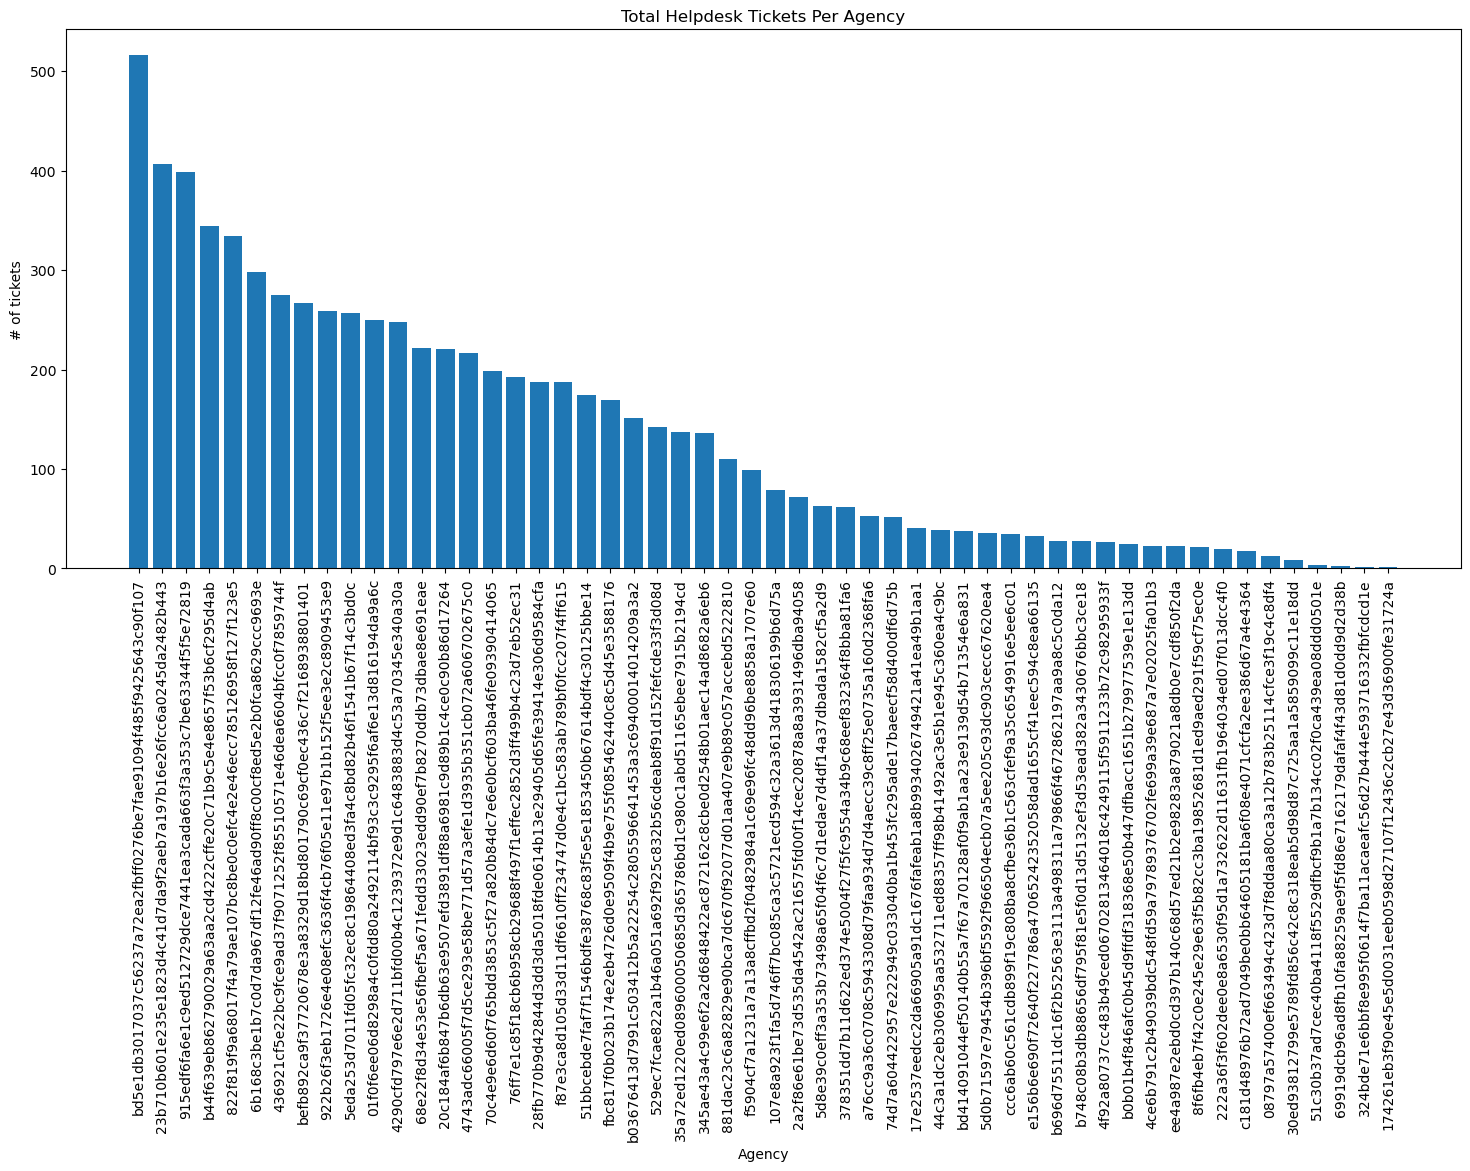

In [27]:
plt.figure(figsize=(18,7))
plt.bar(xvar, yvar)

plt.title('Total Helpdesk Tickets Per Agency')
plt.xlabel('Agency')
plt.ylabel('# of tickets')

plt.xticks(rotation=90)

plt.savefig(fname='total-tickets-chart.png', bbox_inches='tight')
plt.show()

In [28]:
ser_agency_counts.describe()

count     54.000000
mean     134.129630
std      125.397037
min        1.000000
25%       28.000000
50%       89.000000
75%      220.000000
max      516.000000
Name: count, dtype: float64